# CSC420 Assignment 1 #
## Songheng Yin, 1004762303 ##

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

# Step I. Gaussian Blurring #

In [2]:
def getGaussianMatrix(input_size, scale):
    x, y = np.meshgrid(
        np.linspace(-1, 1, input_size),
        np.linspace(-1, 1, input_size),
    )
    G = np.square(x) + np.square(y)
    G = np.exp(-(G / (2 * scale ** 2)))
    G = G / np.sum(G)
    return G

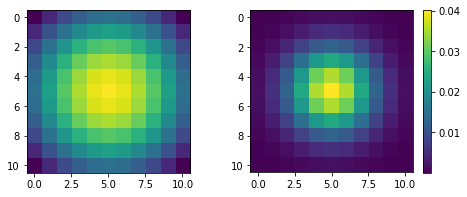

In [3]:
fig, (ax1, ax2) = plt.subplots(figsize=(8, 3), ncols=2)
ax1.imshow(getGaussianMatrix(11, 1))
pos = ax2.imshow(getGaussianMatrix(11, 0.4))
fig.colorbar(pos)
plt.show()

# Part II. Gradient Magnitude #

In [4]:
# We do padding with 0
def pad_with(vector, pad_width, iaxis, kwargs):
    pad_value = kwargs.get('padder', 0)
    vector[:pad_width[0]] = pad_value
    vector[-pad_width[1]:] = pad_value

def getConvolution(image, kernel):
    kernel = np.flip(kernel, axis=0)
    kernel = np.flip(kernel, axis=1)
    kernel_size = kernel.shape[0]
    result = np.zeros_like(image)
    padded_image = np.pad(image, pad_width=(kernel_size - 1) // 2, mode=pad_with, padder=0)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            result_matrix = padded_image[i: i + kernel_size, j: j + kernel_size] * kernel
            result[i, j] = np.sum(result_matrix)
    return result

In [5]:
def getGradientMagnitude(image):
    g_x = getConvolution(image, kernel=np.array(
        [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
    ))
    g_y = getConvolution(image, kernel=np.array(
        [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]
    ))
    edge_strength = np.hypot(g_x, g_y)
    normalized_edge_strengh = edge_strength / edge_strength.max() * 255
    return normalized_edge_strengh

# Part III. Threshold Algorithm #

In [6]:
def getEdgeMappedImage(edge_strength):
    tau = np.sum(edge_strength) / (edge_strength.shape[0] * edge_strength.shape[1])
    while True:
        m_L = np.mean(edge_strength[np.where(edge_strength > tau)])
        m_H = np.mean(edge_strength[np.where(edge_strength < tau)])
        tau, old_tau = (m_L + m_H) / 2, tau
        if abs(tau - old_tau) < 1:
            break
    edge_mapped_img = np.zeros_like(edge_strength)
    edge_mapped_img[np.where(edge_strength >= tau)] = 255
    return edge_mapped_img

# Part IV. Test #

In [7]:
def displayResults(filename):
    img = cv2.imread(filename)
    gray = cv2.cvtColor(np.float32(img), cv2.COLOR_BGR2GRAY)
    # Apply Gaussian Blurring
    gaussian = getGaussianMatrix(input_size=5, scale=1)
    blurred_image = getConvolution(gray, kernel=gaussian)
    # Get the Gradient Magnitude
    edge_strength = getGradientMagnitude(blurred_image)
    # Apply Threshold Algorithm
    edge_mapped_img = getEdgeMappedImage(edge_strength)

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))
    ax1, ax2, ax3, ax4 = axes.flatten()
    ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax1.set_title('Original')
    ax2.imshow(blurred_image, cmap='gray')
    ax2.set_title('Gaussian Blur')
    ax3.imshow(edge_strength, cmap='gray')
    ax3.set_title('Gradient Magnitude')
    ax4.imshow(edge_mapped_img, cmap='gray')
    ax4.set_title('Edge-Mapped')
    plt.show()

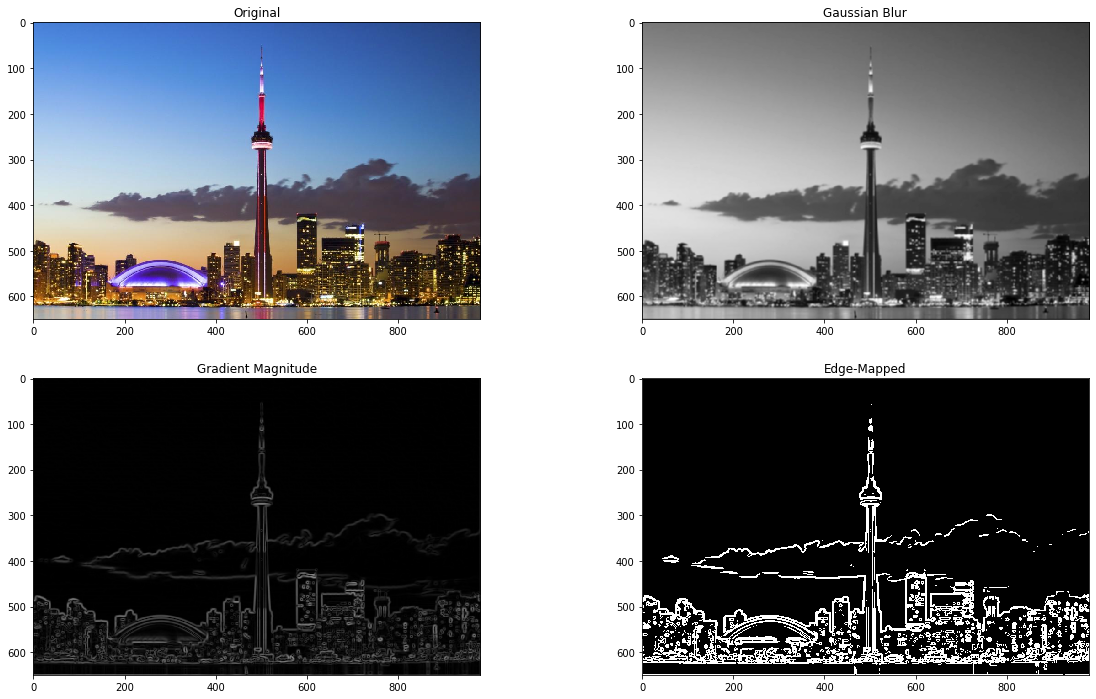

In [8]:
displayResults('image1.jpg')

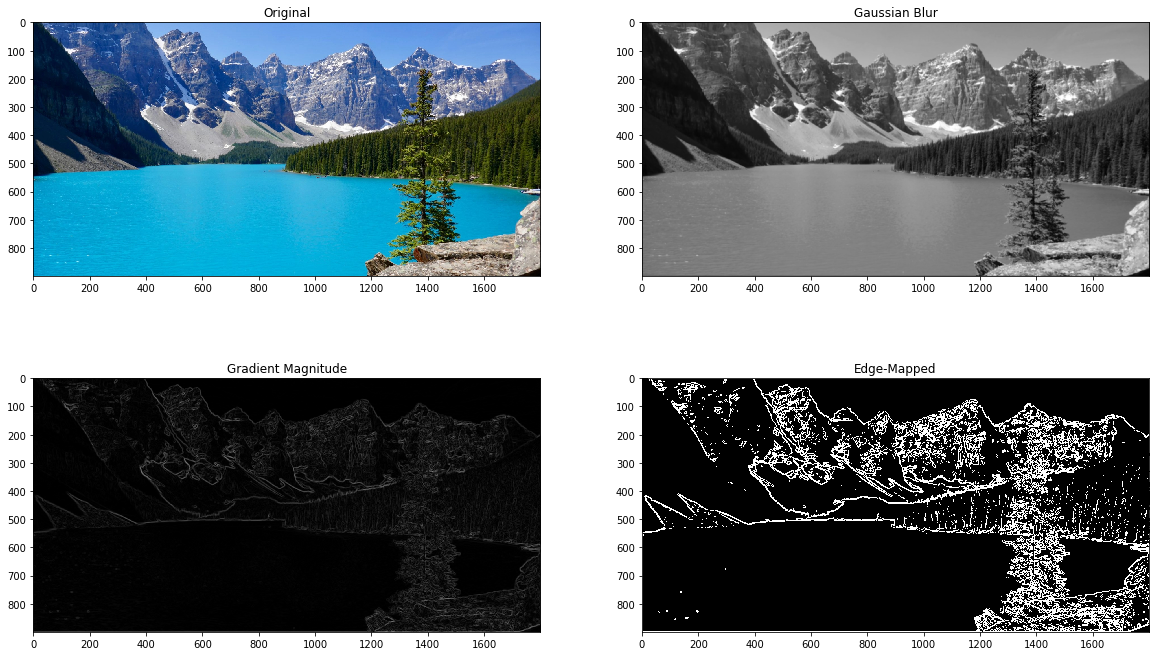

In [9]:
displayResults('image2.jpg')

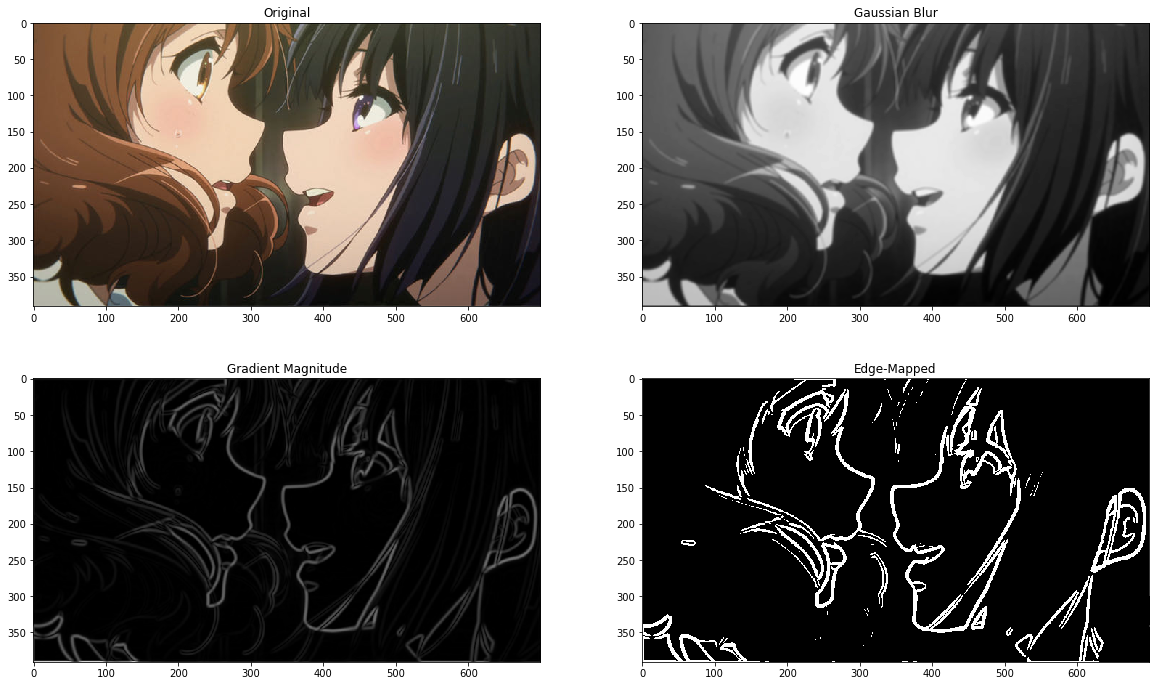

In [10]:
displayResults('image3.jpg')

## Comments ##
<p>The algorithm works well on image2, it clearly generates the contour of the trees, the mountains and the lake. <br />
Its performance on image1 is overall good as well, except for mixing the cloud and the CN tower (you can find a missing line segment for the tower) <br />
The Gaussian blurring makes the images smooth so that the gradient step is less effected by the noises. <br />
The algorithm does not give a complete edge for the image of my choice. Some of the gradient values are too small to pass the threshold.
 </p>